In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [54]:
import sys  
sys.path.insert(0, 'C:\\Users\\albri\\Jupiter Workspace')
import albridge_lib as alb

In [55]:
pd.options.display.expand_frame_repr = False
pd.set_option('display.max_columns', None)

### Data download

In [56]:
X_train_ohe = pd.read_csv('train_ohe.csv', index_col='Id')
y_train = train_ohe['SalePrice']
X_train_ohe.drop('SalePrice', axis=1, inplace=True)
X_train_ohe.shape, y_train.shape

((1460, 230), (1460,))

In [57]:
X_test_ohe = pd.read_csv('test_ohe.csv', index_col='Id')
X_test_ohe.shape

(1459, 230)

In [58]:
X_train_ord = pd.read_csv('train_ord.csv', index_col='Id')
X_train_ord.drop('SalePrice', axis=1, inplace=True)
X_train_ord.shape, y_train.shape

((1460, 78), (1460,))

In [59]:
X_test_ord = pd.read_csv('test_ord.csv', index_col='Id')
X_test_ord.shape

(1459, 78)

In [32]:
cat_cols = []
for c in X_train_ord:
    if c[:4]=='cat_':
        cat_cols.append(c)
cat_cols

['cat_MSSubClass',
 'cat_MSZoning',
 'cat_Alley',
 'cat_LandContour',
 'cat_LotConfig',
 'cat_Neighborhood',
 'cat_Condition1',
 'cat_Condition2',
 'cat_BldgType',
 'cat_HouseStyle',
 'cat_RoofStyle',
 'cat_RoofMatl',
 'cat_Exterior1st',
 'cat_Exterior2nd',
 'cat_MasVnrType',
 'cat_Foundation',
 'cat_Heating',
 'cat_CentralAir',
 'cat_Electrical',
 'cat_GarageType',
 'cat_GarageFinish',
 'cat_Fence',
 'cat_MiscFeature',
 'cat_MoSold',
 'cat_SaleType',
 'cat_SaleCondition']

### Linear models

In [33]:
model = LinearRegression()
res = alb.sklearn_gridCV(model, X_train_ohe, y_train, 'neg_root_mean_squared_error', fit_train=True, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.7s remaining:    1.1s


Best valid score: 0.178 (0.047)
Train score:      0.093 (0.004)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


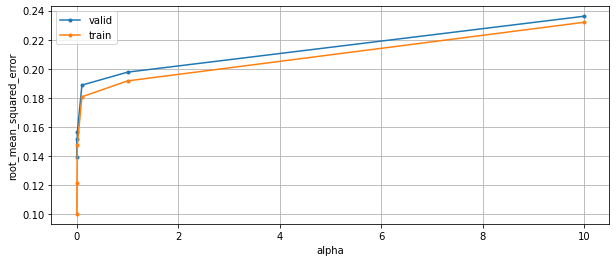

Best valid score: 0.139 (0.026)
Train score:      0.121 (0.005)
Best params: {'alpha': 0.001}


,cv score,cv std,time,train score,train std
{'alpha': 0.0001},0.151,0.021,0.286,0.100,0.003
{'alpha': 0.001},0.139,0.026,0.063,0.121,0.005
{'alpha': 0.01},0.156,0.031,0.020,0.147,0.006
{'alpha': 0.1},0.189,0.036,0.136,0.181,0.009
{'alpha': 1},0.198,0.036,0.038,0.192,0.008
{'alpha': 10},0.236,0.031,0.016,0.232,0.009


In [34]:
model = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
alb.sklearn_gridCV(model, X_train_ohe, y_train, 'neg_root_mean_squared_error', params, fit_train=True)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0380s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1219s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


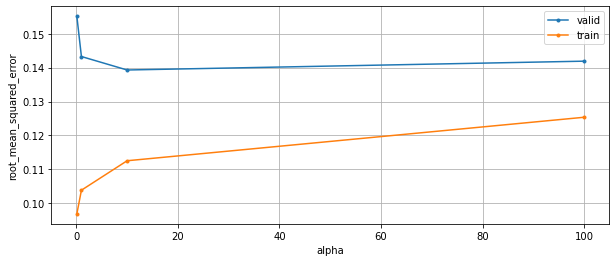

Best valid score: 0.139 (0.023)
Train score:      0.113 (0.004)
Best params: {'alpha': 10}


In [35]:
model = Ridge()
params = {'alpha': [0.1, 1, 10, 100]}
res = alb.sklearn_gridCV(model, X_train_ohe, y_train, 'neg_root_mean_squared_error', params, fit_train=True)

### Random Forest

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   17.6s finished


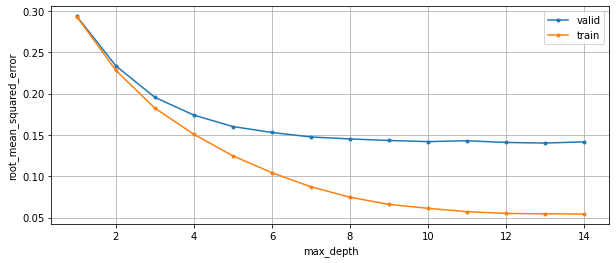

Best valid score: 0.140 (0.008)
Train score:      0.055 (0.002)
Best params: {'max_depth': 13}


,cv score,cv std,time,train score,train std
{'max_depth': 1},0.293,0.008,0.245,0.293,0.002
{'max_depth': 2},0.233,0.007,0.336,0.228,0.003
{'max_depth': 3},0.195,0.006,0.442,0.182,0.002
{'max_depth': 4},0.174,0.006,0.556,0.151,0.002
{'max_depth': 5},0.160,0.008,0.652,0.125,0.001
{'max_depth': 6},0.153,0.007,0.772,0.104,0.001
{'max_depth': 7},0.148,0.008,0.836,0.087,0.001
{'max_depth': 8},0.145,0.008,0.982,0.075,0.001
{'max_depth': 9},0.143,0.009,1.097,0.066,0.001
{'max_depth': 10},0.142,0.007,1.193,0.061,0.001


In [36]:
rf = RandomForestRegressor()
params = {'max_depth': range(1,15)}
alb.sklearn_gridCV(rf, X_train_ord, y_train, 'neg_root_mean_squared_error', params, fit_train=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.9s finished


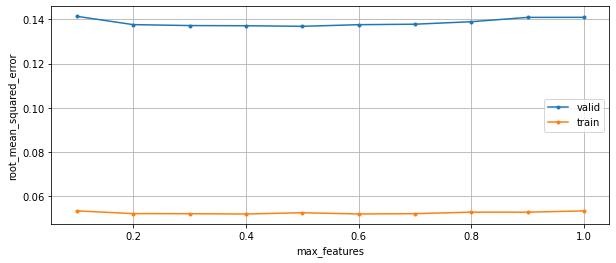

Best valid score: 0.137 (0.009)
Train score:      0.053 (0.001)
Best params: {'max_features': 0.5}


,cv score,cv std,time,train score,train std
{'max_features': 0.1},0.141,0.010,0.367,0.053,0.001
{'max_features': 0.2},0.138,0.010,0.489,0.052,0.001
{'max_features': 0.30000000000000004},0.137,0.009,0.632,0.052,0.001
{'max_features': 0.4},0.137,0.010,0.744,0.052,0.001
{'max_features': 0.5},0.137,0.009,0.847,0.053,0.001
{'max_features': 0.6},0.138,0.009,0.990,0.052,0.001
{'max_features': 0.7000000000000001},0.138,0.009,1.083,0.052,0.001
{'max_features': 0.8},0.139,0.010,1.254,0.053,0.001
{'max_features': 0.9},0.141,0.008,1.385,0.053,0.001
{'max_features': 1.0},0.141,0.009,1.449,0.053,0.001


In [37]:
rf = RandomForestRegressor()
params = {'max_features': np.arange(0.1,1.01,0.1)}
alb.sklearn_gridCV(rf, X_train_ord, y_train, 'neg_root_mean_squared_error', params, fit_train=True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0969s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1192s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    9.6s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   15.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.8s finished


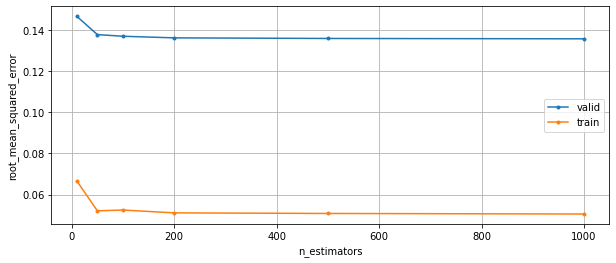

Best valid score: 0.136 (0.009)
Train score:      0.051 (0.001)
Best params: {'n_estimators': 1000}


,cv score,cv std,time,train score,train std
{'n_estimators': 10},0.147,0.013,0.081,0.067,0.001
{'n_estimators': 50},0.138,0.008,0.401,0.052,0.001
{'n_estimators': 100},0.137,0.008,0.756,0.052,0.001
{'n_estimators': 200},0.136,0.009,1.425,0.051,0.001
{'n_estimators': 500},0.136,0.009,3.569,0.051,0.001
{'n_estimators': 1000},0.136,0.009,7.033,0.051,0.001


In [38]:
rf = RandomForestRegressor(max_features=0.4)
params = {'n_estimators': [10,50,100,200,500,1000]}
alb.sklearn_gridCV(rf, X_train_ord, y_train, 'neg_root_mean_squared_error', params, fit_train=True)

### Gradient Boosting

In [40]:
lgb_train = lgb.Dataset(X_train_ord, label=y_train, free_raw_data=False, silent=True, categorical_feature=cat_cols)
lgb_train.construct()

[100]	cv_agg's rmse: 0.12898 + 0.00757785
Best res: 0.12889
Best iteration: 86
Last res: 0.12889
Wall time: 5.33 s


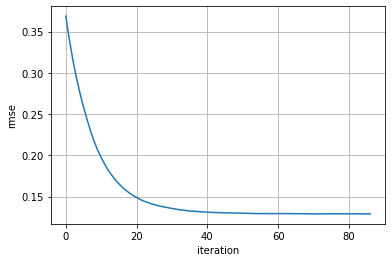

In [41]:
%%time
params = {'n_jobs': -1, 'verbose': -1, 'objective': 'regression'}
alb.lgb_cv(lgb_train, 'rmse', 1000, params, cat_cols=cat_cols)

params={'max_depth': 2, 'num_leaves': 5}  res=0.125690  iter=303
params={'max_depth': 2, 'num_leaves': 10}  res=0.125690  iter=303
params={'max_depth': 2, 'num_leaves': 15}  res=0.125690  iter=303
params={'max_depth': 3, 'num_leaves': 5}  res=0.126380  iter=298
params={'max_depth': 3, 'num_leaves': 10}  res=0.125760  iter=184
params={'max_depth': 3, 'num_leaves': 15}  res=0.125760  iter=184
params={'max_depth': 4, 'num_leaves': 5}  res=0.125680  iter=214
params={'max_depth': 4, 'num_leaves': 10}  res=0.126830  iter=251
params={'max_depth': 4, 'num_leaves': 15}  res=0.127190  iter=168
params={'max_depth': 5, 'num_leaves': 5}  res=0.125680  iter=214
params={'max_depth': 5, 'num_leaves': 10}  res=0.127810  iter=88
params={'max_depth': 5, 'num_leaves': 15}  res=0.125970  iter=145
params={'max_depth': 6, 'num_leaves': 5}  res=0.125680  iter=214
params={'max_depth': 6, 'num_leaves': 10}  res=0.126730  iter=141
params={'max_depth': 6, 'num_leaves': 15}  res=0.127680  iter=123
params={'max_dep

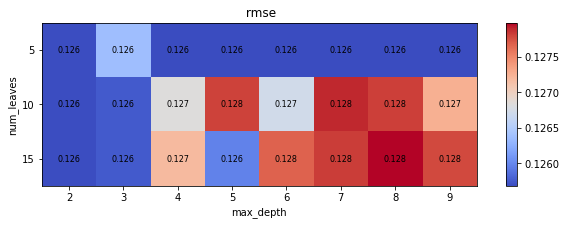

Best cv score: 0.12568
Best params: {'max_depth': 4, 'num_leaves': 5}
Best iteration: 214
Wall time: 58.6 s


In [42]:
%%time
model_params = {'n_jobs': -1, 'verbose': -1, 'objective': 'regression'}
grid_params = {'num_leaves': range(5,20,5), 'max_depth': range(2,10)}
cvb = alb.lgb_gridCV(lgb_train, 'rmse', N=1000, model_params=model_params, grid_params=grid_params, cat_cols=cat_cols)

params={'feature_fraction': 0.1}  res=0.126050  iter=346
params={'feature_fraction': 0.2}  res=0.125980  iter=429
params={'feature_fraction': 0.30000000000000004}  res=0.126140  iter=174
params={'feature_fraction': 0.4}  res=0.125640  iter=192
params={'feature_fraction': 0.5}  res=0.125710  iter=281
params={'feature_fraction': 0.6}  res=0.126780  iter=245
params={'feature_fraction': 0.7000000000000001}  res=0.124780  iter=319
params={'feature_fraction': 0.8}  res=0.124600  iter=247
params={'feature_fraction': 0.9}  res=0.125410  iter=230
params={'feature_fraction': 1.0}  res=0.125680  iter=214


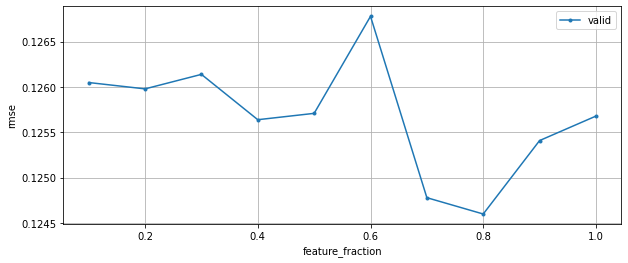

Best cv score: 0.1246
Best params: {'feature_fraction': 0.8}
Best iteration: 247
Wall time: 24.1 s


In [34]:
%%time
model_params = {'n_jobs': -1, 'verbose': -1, 'max_depth': 4, 'num_leaves': 5}
grid_params = {'feature_fraction': np.arange(0.1, 1.01, 0.1)}
cvb = alb.lgb_gridCV(lgb_train, 'rmse', N=1000, model_params=model_params, grid_params=grid_params, cat_cols=cat_cols)

params={'lambda_l1': 0.0001}  res=0.131830  iter=499
params={'lambda_l1': 0.001}  res=0.131880  iter=504
params={'lambda_l1': 0.01}  res=0.131880  iter=629
params={'lambda_l1': 0.1}  res=0.132270  iter=425
params={'lambda_l1': 1}  res=0.134050  iter=501
params={'lambda_l1': 10}  res=0.162490  iter=673


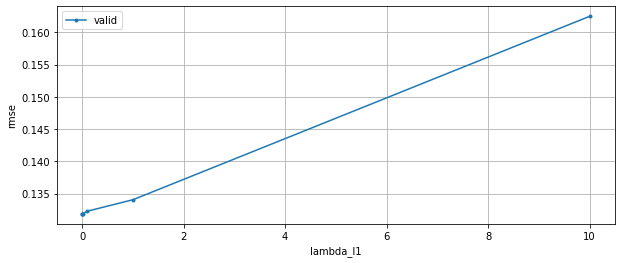

Best cv score: 0.13183
Best params: {'lambda_l1': 0.0001}
Best iteration: 499
Wall time: 16.3 s


In [108]:
%%time
model_params = {'n_jobs': -1, 'verbose': -1, 'max_depth': 4, 'num_leaves': 5, 'feature_fraction': 0.8}
grid_params = {'lambda_l1': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
cvb = alb.lgb_gridCV(lgb_train, 'rmse', N=1000, model_params=model_params, grid_params=grid_params, cat_cols=cat_cols)

params={'lambda_l2': 0.0001}  res=0.124600  iter=247
params={'lambda_l2': 0.001}  res=0.124600  iter=247
params={'lambda_l2': 0.01}  res=0.124030  iter=253
params={'lambda_l2': 0.1}  res=0.123990  iter=274
params={'lambda_l2': 1}  res=0.125110  iter=204
params={'lambda_l2': 10}  res=0.126960  iter=230
params={'lambda_l2': 100}  res=0.126710  iter=628


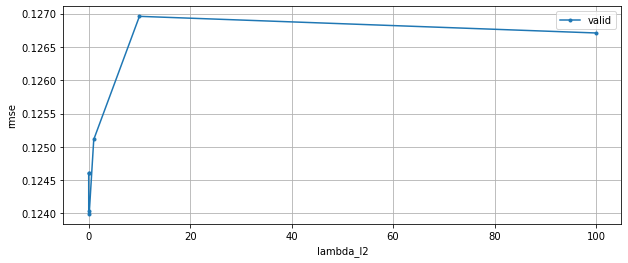

Best cv score: 0.12399
Best params: {'lambda_l2': 0.1}
Best iteration: 274
Wall time: 17.3 s


In [35]:
%%time
model_params = {'n_jobs': -1, 'verbose': -1, 'max_depth': 4, 'num_leaves': 5, 'feature_fraction': 0.8}
grid_params = {'lambda_l2': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
cvb = alb.lgb_gridCV(lgb_train, 'rmse', N=1000, model_params=model_params, grid_params=grid_params, cat_cols=cat_cols)

### Test prediction

In [47]:
def make_submission(pred_test, ind):
    '''for i in range(len(pred_test)):
        if pred_test[i]<0:
            pred_test[i]=0'''
    my_submission = pd.DataFrame({'Id': ind, 'SalePrice': np.expm1(pred_test)})
    my_submission.to_csv('submission.csv',index=False)

In [48]:
model = Ridge(alpha=10)
model.fit(X_train_ohe, y_train)
pred_test = model.predict(X_test_ohe)
make_submission(pred_test, X_test_ohe.index)

In [52]:
params = {'n_jobs': -1, 
          'verbose': -1, 
          'num_leaves': 5,
          'max_depth': 4, 
          'feature_fraction': 0.8,
          'lambda_l2': 0.1
         }

model = lgb.train(params, lgb_train, 400, categorical_feature=cat_cols)
pred_test = model.predict(X_test_ord)
make_submission(pred_test, X_test_ord.index)